In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests
from census import Census
import os
from api_keys import census_key

In [2]:
filepath = os.path.join('Resources','each_state_new_cancer_rate.csv')
df = pd.read_csv(filepath)
df = df.rename(columns = {'Unnamed: 0':'States'})
df = df.iloc[1:]
df.head()

,States,Cancer Type,Age,Sex,Race,Type,Age-Adjusted Rate,Case Count,Population
1,New Mexico,All Types of Cancer,NaN,Male and Female,All Races and Ethnicities,Incidence,350.4,9202,2092741
2,Arizona,All Types of Cancer,NaN,Male and Female,All Races and Ethnicities,Incidence,368.1,32863,7158024
3,Colorado,All Types of Cancer,NaN,Male and Female,All Races and Ethnicities,Incidence,387.2,24550,5691287
4,California,All Types of Cancer,NaN,Male and Female,All Races and Ethnicities,Incidence,388.4,171748,39461588
5,Wyoming,All Types of Cancer,NaN,Male and Female,All Races and Ethnicities,Incidence,394.1,2812,577601


In [3]:
#from config import api_key
c = Census(census_key, year=2018)

In [4]:
census_data = c.acs5.get(("NAME", "B17001_002E"), {'for': 'state:*'})
census_pd = pd.DataFrame(census_data)
census_pd.head()

,NAME,B17001_002E,state
0,Mississippi,599795.0,28
1,Missouri,837930.0,29
2,Montana,139063.0,30
3,Nebraska,213790.0,31
4,Nevada,393431.0,32


In [5]:
census_pd = census_pd.rename(columns={'NAME':'States', "B17001_002E": "Poverty Count"})
census_pd = census_pd[['States','Poverty Count']]
combined_df = pd.merge(census_pd,df, on = "States", how = 'outer')
combined_df = combined_df[['States','Poverty Count','Age-Adjusted Rate','Case Count','Population']]
combined_df = combined_df.drop([4,27])
combined_df ['Poverty Count'] = combined_df ['Poverty Count'].astype(int)
combined_df ['Population'] = combined_df ['Population'].astype(int)
combined_df ['Age-Adjusted Rate'] = combined_df ['Age-Adjusted Rate'].astype(float)
combined_df['Poverty Rate'] = combined_df['Poverty Count']/combined_df['Population']*100000
combined_df.head()

,States,Poverty Count,Age-Adjusted Rate,Case Count,Population,Poverty Rate
0,Mississippi,599795,471.4,17037,2981020,20120.462124
1,Missouri,837930,430.3,33143,6121623,13688.036653
2,Montana,139063,451.7,6412,1060665,13110.925693
3,Nebraska,213790,477.7,10798,1925614,11102.432782
5,New Hampshire,102352,460.9,8511,1353465,7562.219932


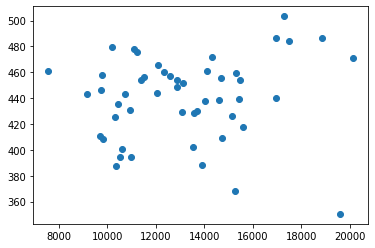

In [6]:
plt.scatter(combined_df['Poverty Rate'], combined_df['Age-Adjusted Rate'])
plt.show()
plt.title()
plt.ylabel('Poverty Per Capita')
plt.xlabel('New Cancer Rate')

The r-squared is: 0.011659917324299262


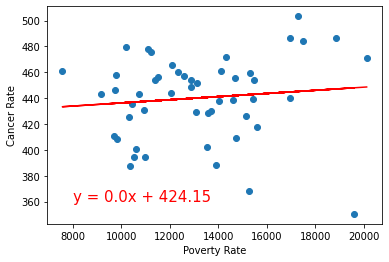

In [7]:
x_values = combined_df['Poverty Rate']
y_values = combined_df['Age-Adjusted Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8000,360),fontsize=15,color="red")
plt.xlabel('Poverty Rate')
plt.ylabel('Cancer Rate')
print(f"The r-squared is: {rvalue**2}")
plt.show()